Data

In [1]:
import pandas as pd
import numpy as np

file = r'tellu_containers_with_cpu_memory.csv'
df = pd.read_csv(file)

# dataset
dataset = df.values
X = dataset[:, 3] # cpu column
print(np.min(X)," ",np.max(X))
print(len(X))
Y = dataset[:, 4] # mem column
print(np.min(Y)," ",np.max(Y))
print(len(Y))

0.050858819   3.504917676
470016
0.53515625   0.73828125
470016


Reshape + Split

In [3]:
X = X.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
print("Train: ", X_train.shape)
print("Val: ", X_val.shape)
print("Test: ", X_test.shape)

Train:  (300809, 1)
Val:  (75203, 1)
Test:  (94004, 1)


Model

In [4]:
from sklearn.ensemble import GradientBoostingRegressor

# model
gbr = GradientBoostingRegressor(subsample=0.8,
                                learning_rate=0.4,
                                n_estimators=14,
                                max_depth=40,
                                min_samples_split=200,
                                min_samples_leaf=40,
                                loss="absolute_error")

Fit + Predict

In [5]:
# fit
gbr.fit(X_train, Y_train)

# prediction
Y_predict = gbr.predict(X_test)

Errors

In [6]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(Y_test, Y_predict)
mape = mean_absolute_percentage_error(Y_test, Y_predict)
print("MAPE : ", mape)
print("MAE : ", mae)

MAPE :  0.04348878129496803
MAE :  0.027330436173452696


Loss Curve

<function matplotlib.pyplot.show(close=None, block=None)>

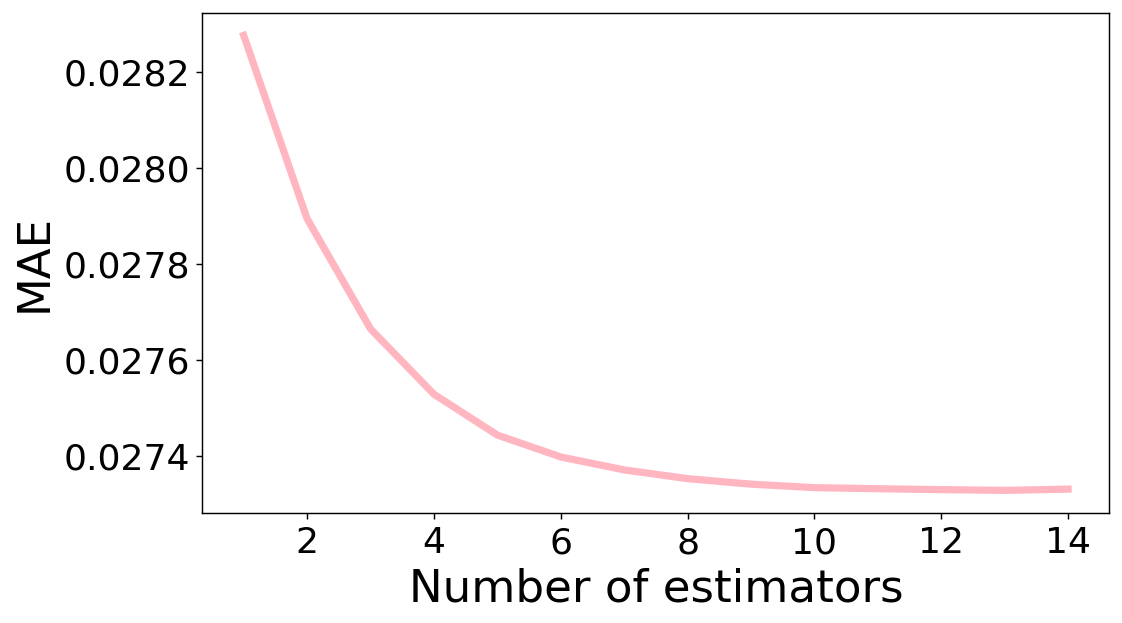

In [7]:
import matplotlib.pyplot as plt
mae = []
for Y_predict in gbr.staged_predict(X_test):
    mae.append(mean_absolute_error(Y_test, Y_predict))

fig, ax = plt.subplots(figsize=(9, 5), dpi=130)
plt.subplot().tick_params(labelsize=20)
ax.plot(np.arange(1, gbr.n_estimators + 1), mae, color='lightpink', linewidth=4)
ax.set_xlabel('Number of estimators', fontsize=25)
ax.set_ylabel('MAE', fontsize=25)
#ax.grid(True, alpha=0.5)
plt.show

Graph

In [8]:
replica_actual = []
for i in range(len(X_test)):
    replica_actual.append(np.ceil(X_test[i]/Y_test[i]))
    
replica_gbr = []
for i in range(len(X_test)):
    replica_gbr.append(np.ceil(X_test[i]/Y_predict[i]))

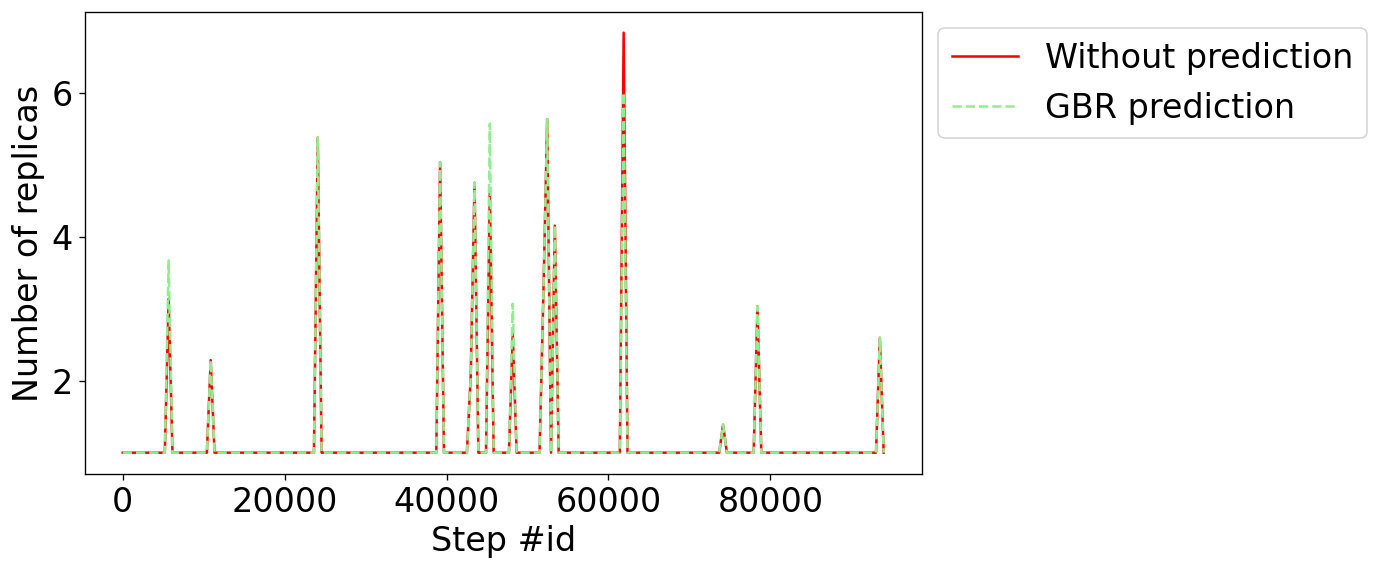

In [9]:
from scipy.interpolate import pchip

plt.figure(figsize=(9, 5), dpi=120)
plt.subplot().tick_params(labelsize=20)
N = 94004
X_ = np.linspace(np.arange(N).min(), np.arange(N).max(), 200) #/1000

X_Y_Spline = pchip(np.arange(N), np.array(np.ceil(replica_actual)))
Y_ = X_Y_Spline(X_)
plt.plot(X_,Y_, label='Without prediction', color="red")

X_Y_Spline = pchip(np.arange(N), np.array(np.ceil(replica_gbr)))
Y_ = X_Y_Spline(X_)
plt.plot(X_,Y_,  label='GBR prediction', color="lightgreen", linestyle='dashed')

'''plt.ylabel('Number of replicas $\cdot\ 10^3$', fontsize=20)
plt.xlabel('Step #id', fontsize=20)'''
plt.ylabel('Number of replicas', fontsize=20)
plt.xlabel('Step #id', fontsize=20)
plt.legend( loc="best",  bbox_to_anchor =(1,1),fontsize=20, ncol=1)
plt.show()